In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
os.getcwd()
os.chdir('../')

In [7]:
os.getcwd()

'd:\\Boston'

In [9]:
df= pd.read_csv('data/Boston.csv',index_col='Unnamed: 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


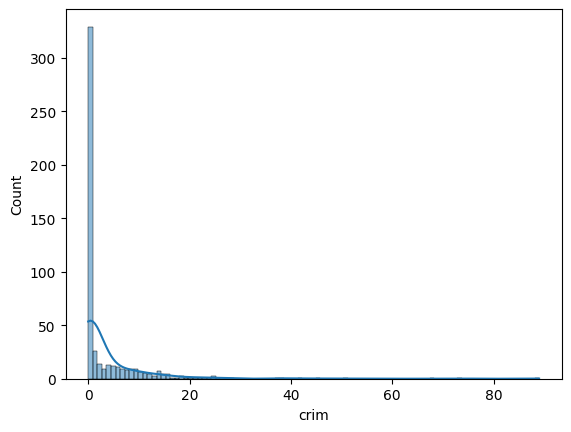

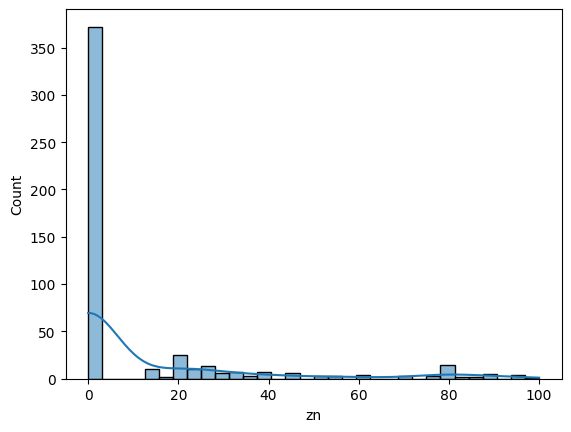

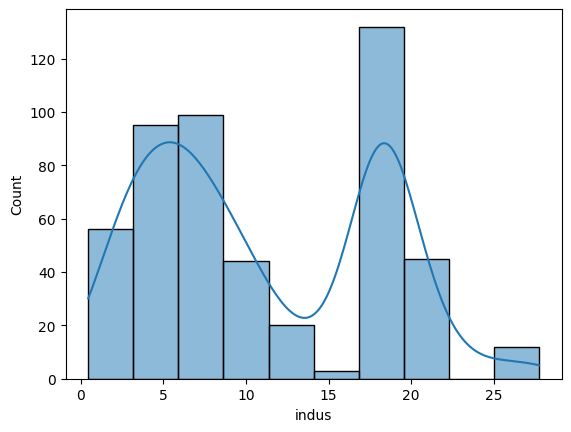

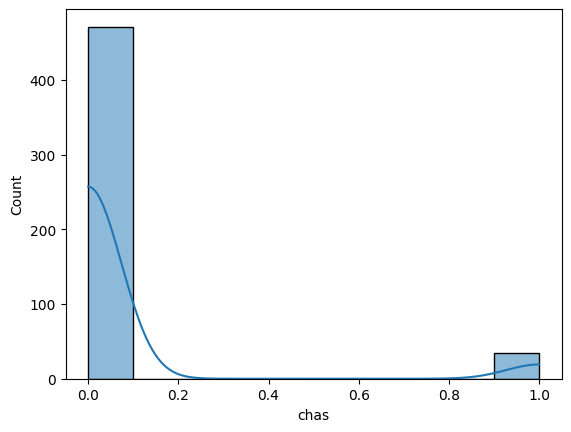

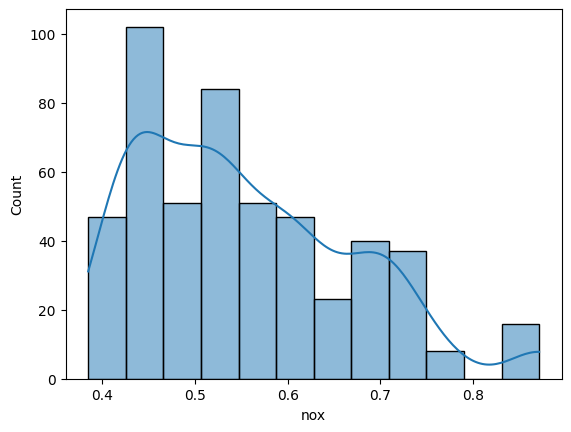

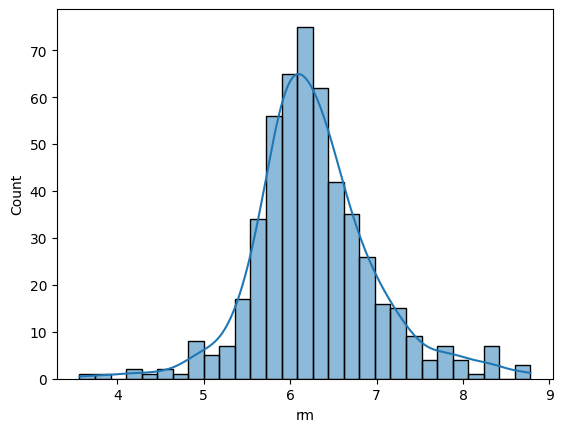

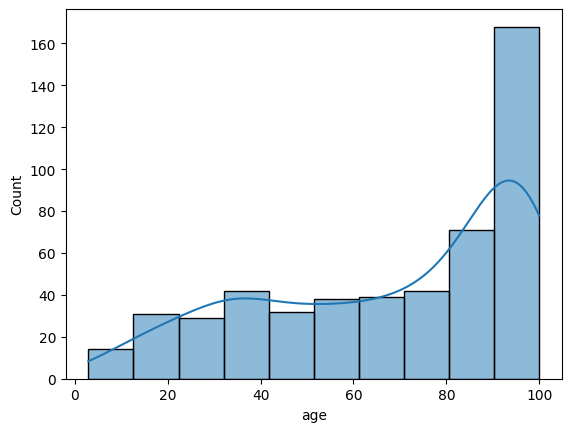

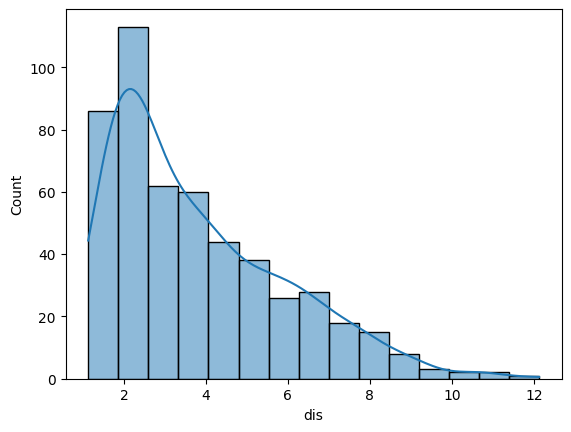

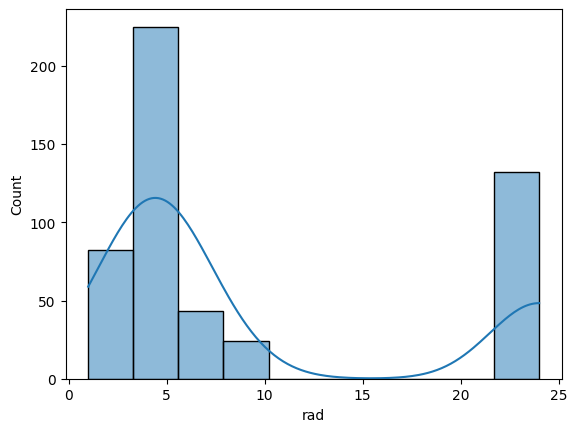

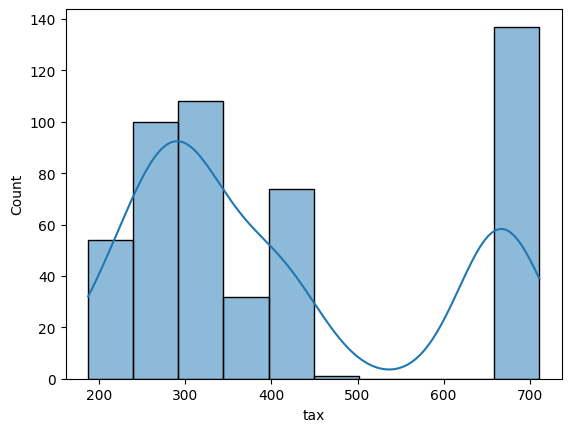

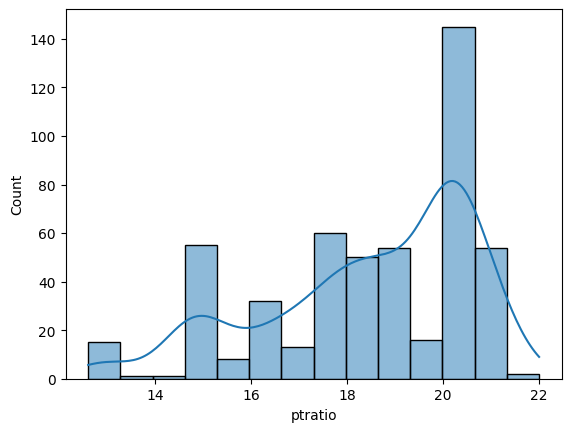

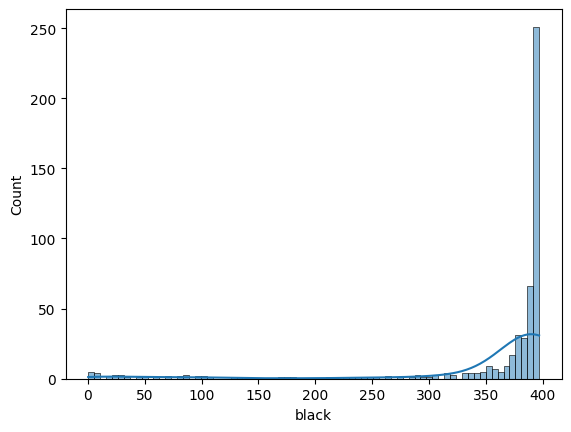

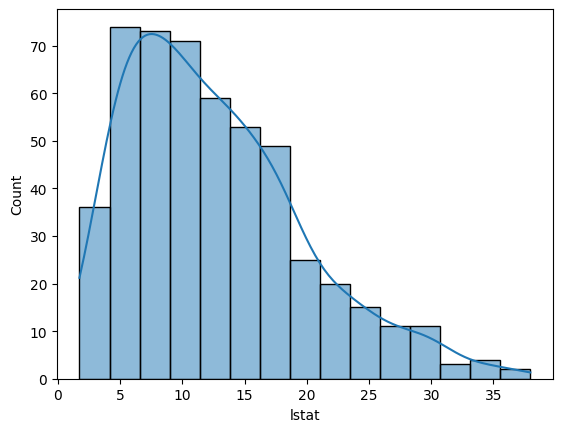

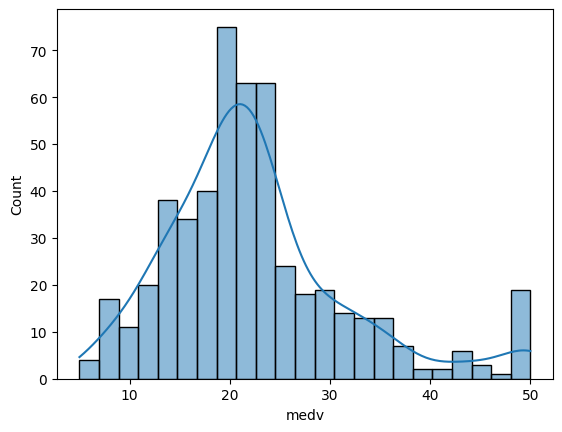

In [12]:
## visualizing the dataset :
for col in df.columns :
    sns.histplot(df[col], kde=True)
    plt.show()

### Observation1 :
- Dataset is highly skewed 
- Will use log transformation for columns crim, zn, chas, nox , dis, rad, tax. ptratio, black, lstat

In [13]:
import scipy.stats as stats
for col in df.columns:
    print(f"Skewness for {col} is:", stats.skew(df[col]))
    

Skewness for crim is: 5.207652387859715
Skewness for zn is: 2.219063057148425
Skewness for indus is: 0.29414627684418543
Skewness for chas is: 3.395799292642519
Skewness for nox is: 0.7271441597740319
Skewness for rm is: 0.40241466802496245
Skewness for age is: -0.5971855948016143
Skewness for dis is: 1.0087787565152246
Skewness for rad is: 1.0018334924536951
Skewness for tax is: 0.6679682687237768
Skewness for ptratio is: -0.7999445320367449
Skewness for black is: -2.8817983452627716
Skewness for lstat is: 0.9037707431346133
Skewness for medv is: 1.104810822864635


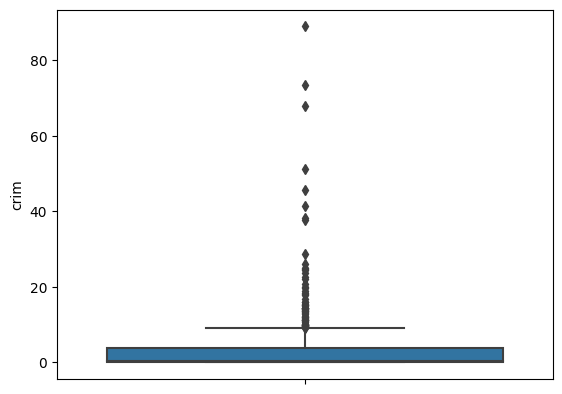

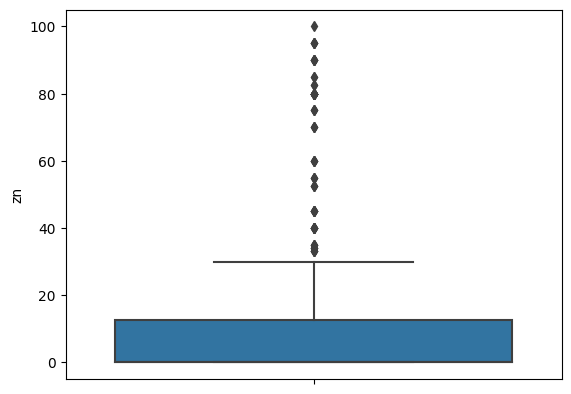

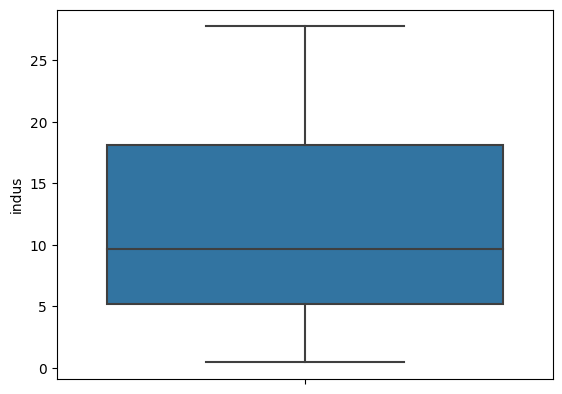

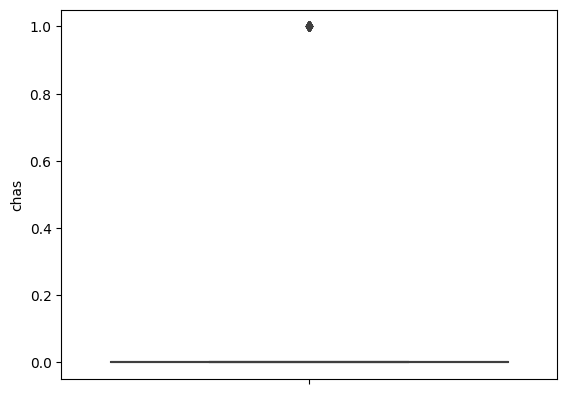

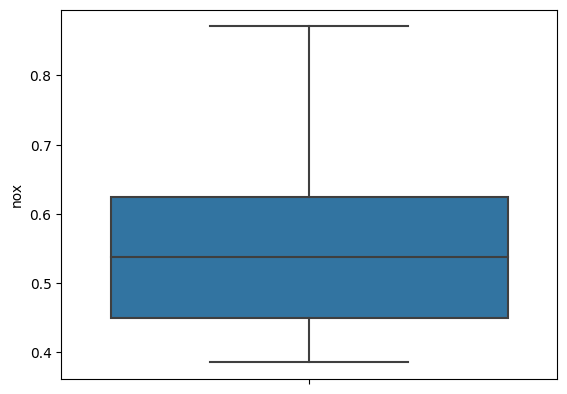

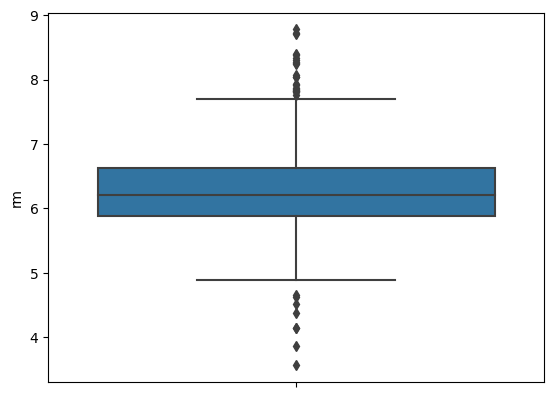

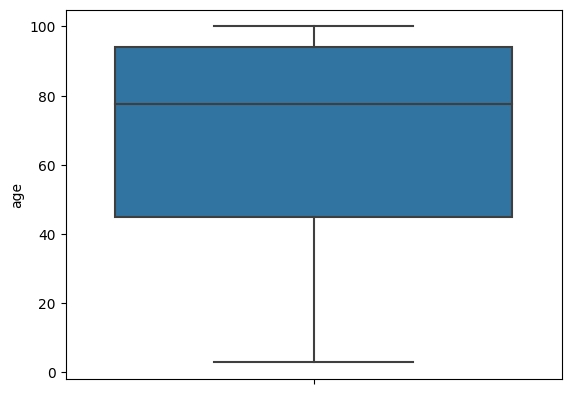

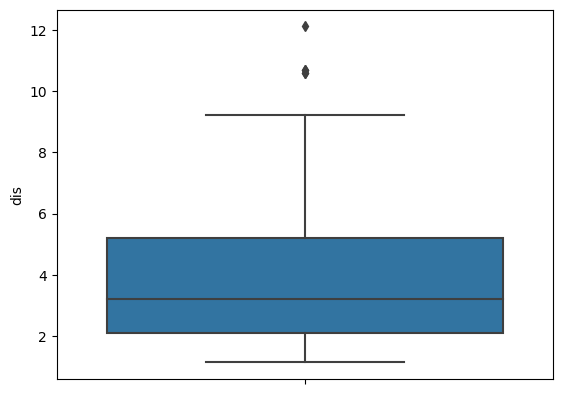

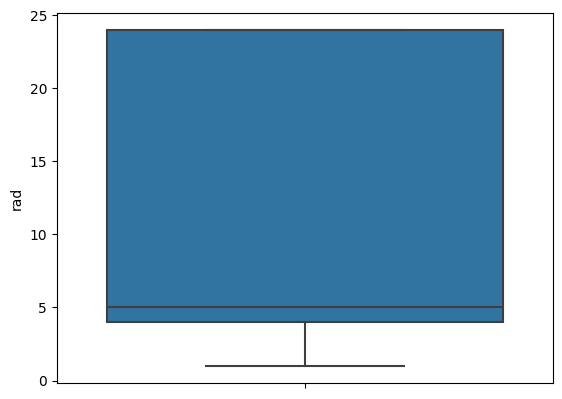

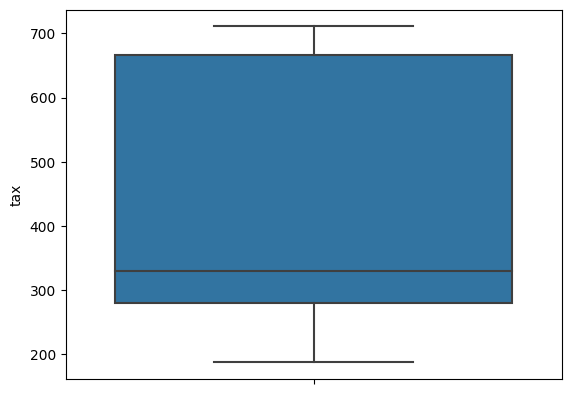

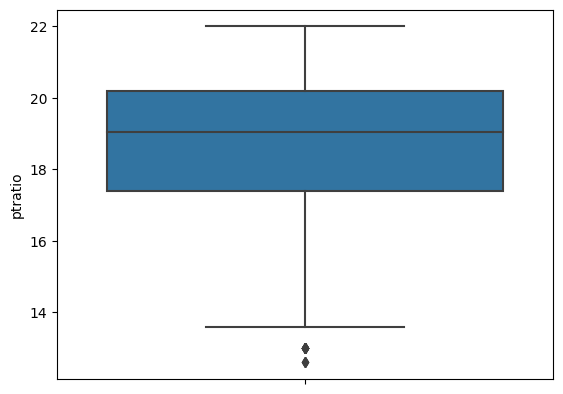

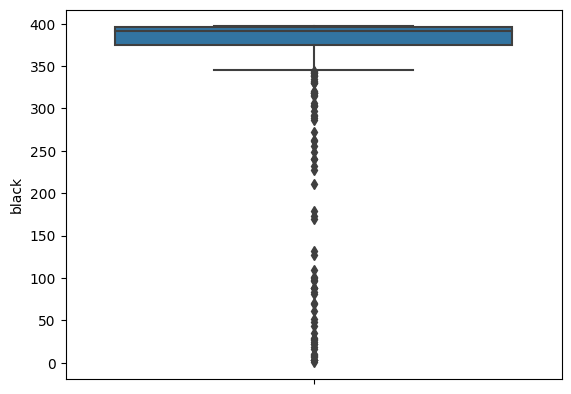

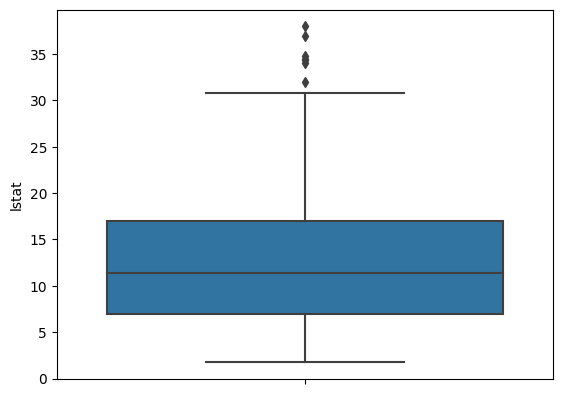

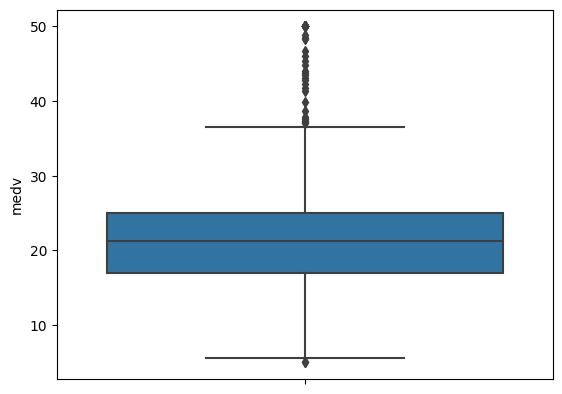

In [13]:
 ## box plot for detecting outliers:
for col in df.columns :
    sns.boxplot(y=df[col])
    plt.show()

`crim` :` per capita crime rate by town.
`zn` : proportion of residential land zoned for lots over 25,000 sq.ft.
`indus`: proportion of non-retail business acres per town.
`chas` : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
`nox` : nitrogen oxides concentration (parts per 10 million).
`rm`:average number of rooms per dwelling.
`age`: proportion of owner-occupied units built prior to 1940.
`dis` :weighted mean of distances to five Boston employment centres.
`rad`:index of accessibility to radial highways.
`tax` :full-value property-tax rate per \$10,000.
`ptratio`:pupil-teacher ratio by town.
`black`:1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
`lstat`:lower status of the population (percent).
`medv` :median value of owner-occupied homes in \$1000s.

<AxesSubplot:>

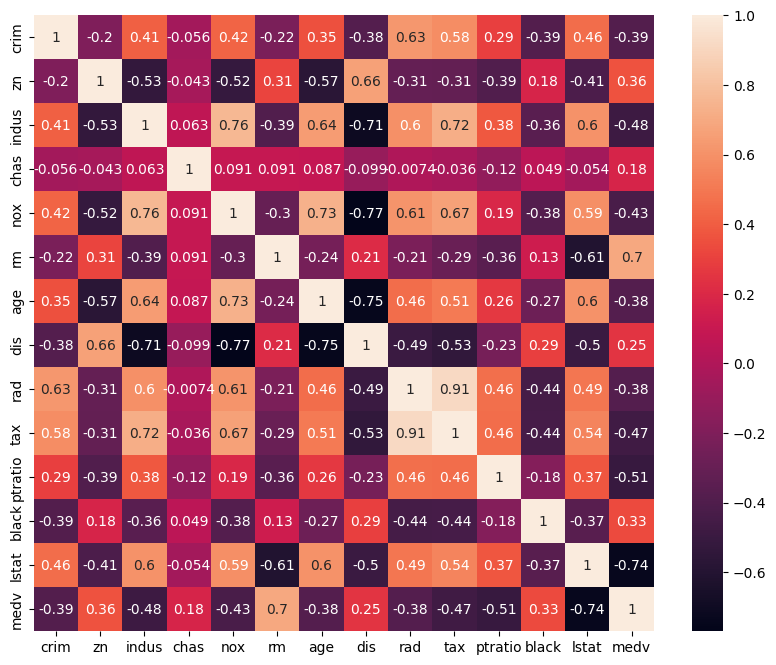

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True)

### observation2 :
- Will be using linear Regression to build model. From the heatmap its clear that mdev have high correlation with below columns:
   - indus, nox, rm, tax, ptratio, lstat, dis , age
- columns rad and tax are highly corerelated with 91% correlation , thus using tax and dropoing rad
- using log transformation for lstat, nox, ptratio, dis

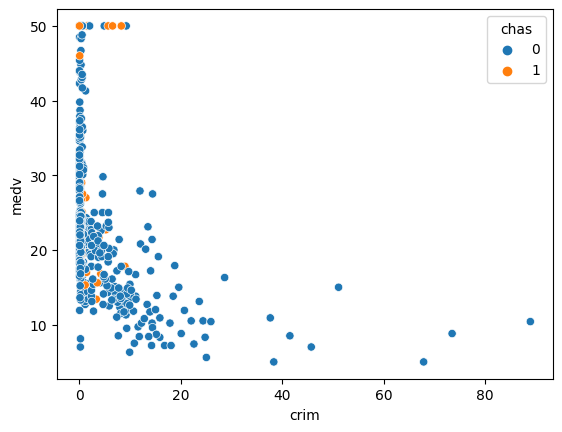

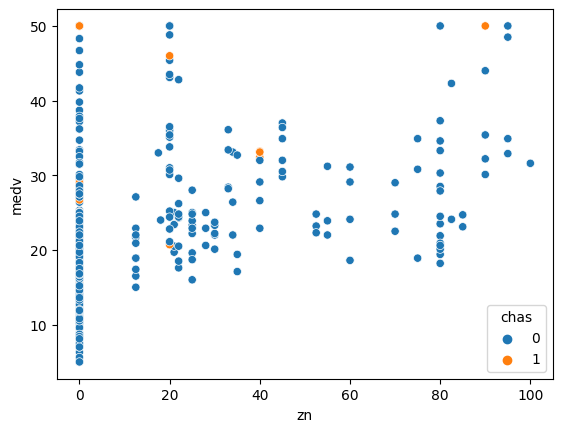

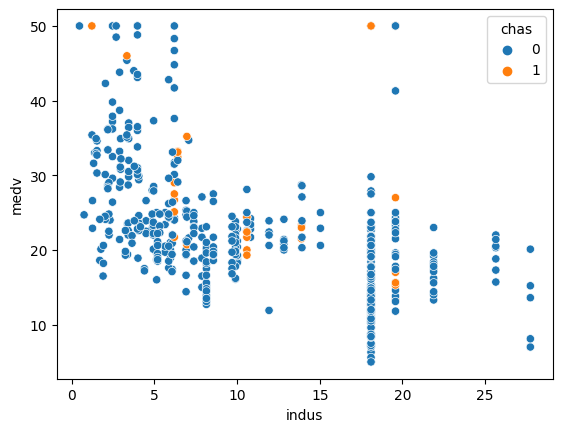

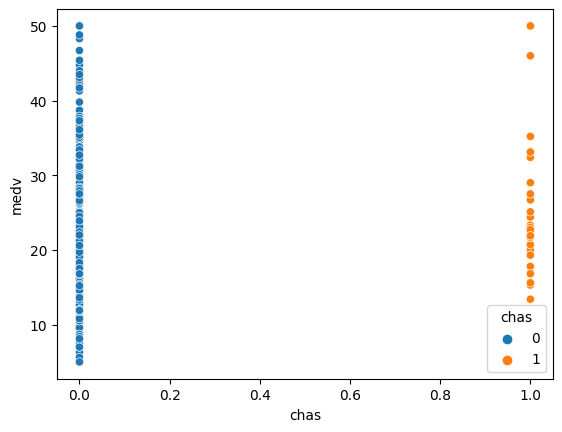

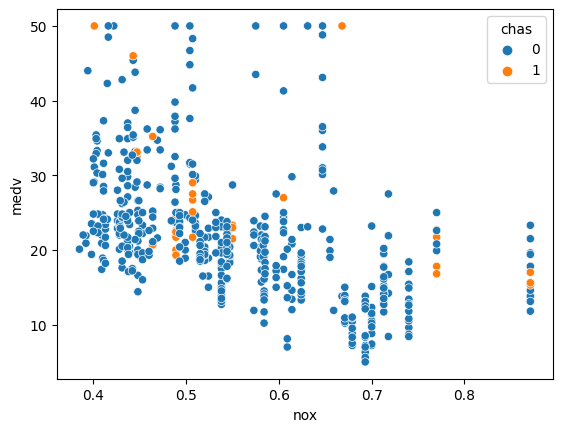

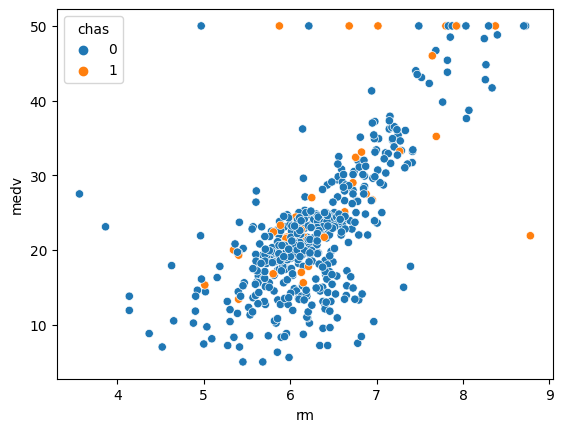

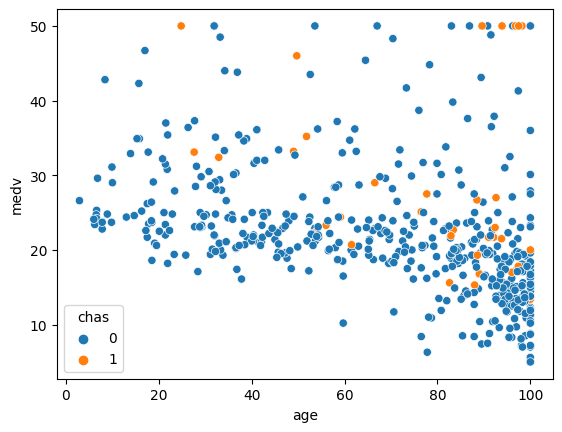

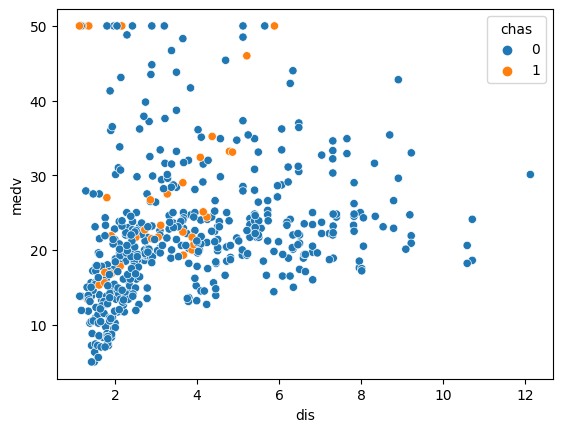

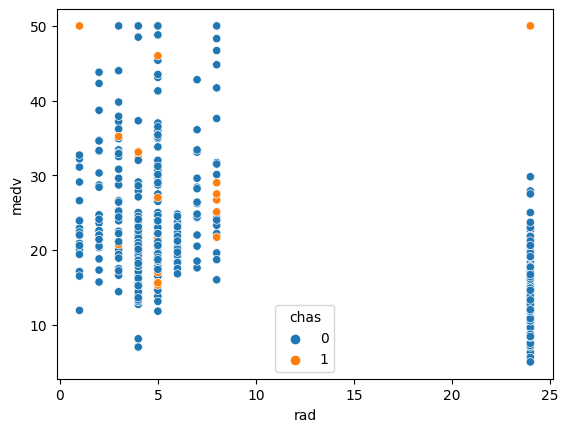

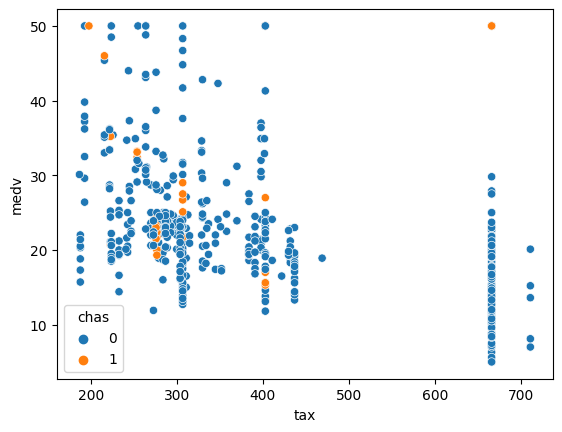

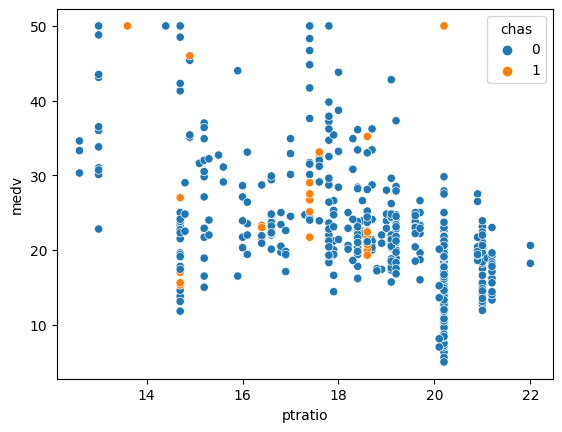

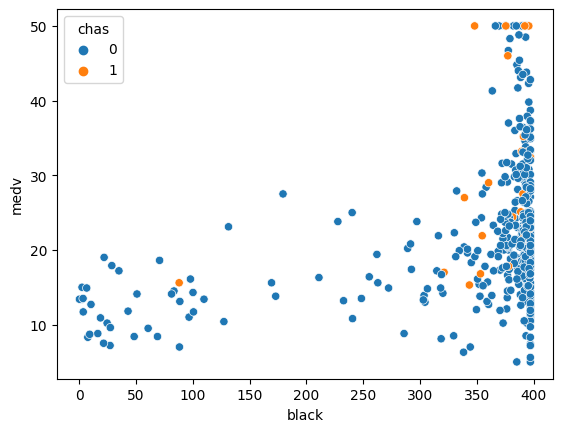

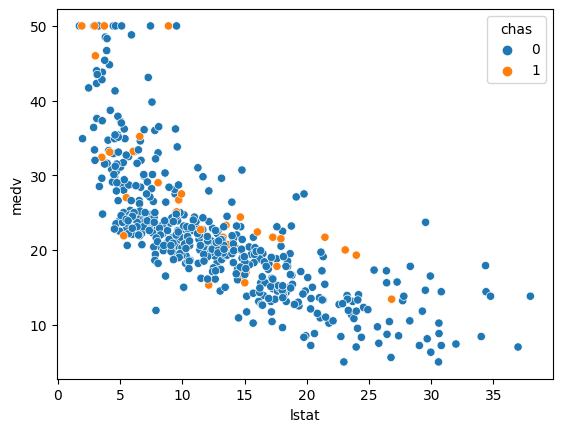

In [21]:
for col in df.drop(columns=['medv']).columns :
    sns.scatterplot(x=df[col],y=df['medv'], hue=df['chas'])
    plt.show()